In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import sklearn.metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Read data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mzisyraf/GoldStockAdvisor/main/FINAL_USO.csv', parse_dates = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [ ]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 81, dtype: object

In [ ]:
# Normalise data in every column

# apply normalization techniques to Price column
for column in df.columns:
  if column != 'Date':
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,0.744604,0.738369,0.708213,0.708932,0.708932,0.216899,0.005672,0.005128,0.011410,...,0.882804,0.871333,0.866741,0.069810,0.860865,0.843595,0.843889,0.827313,0.827313,0.106029
1,2011-12-16,0.738655,0.744116,0.738341,0.748598,0.748598,0.180089,0.000994,0.003671,0.007393,...,0.893396,0.893556,0.889119,0.050814,0.839550,0.830756,0.834374,0.831424,0.831424,0.105682
2,2011-12-19,0.754842,0.750821,0.744669,0.743674,0.743674,0.119667,0.000000,0.000000,0.000000,...,0.870633,0.860000,0.855329,0.045691,0.845767,0.829297,0.840321,0.829369,0.829369,0.058437
3,2011-12-20,0.773381,0.772304,0.775210,0.772534,0.772534,0.082714,0.000702,0.010605,0.001979,...,0.900834,0.900444,0.896056,0.030410,0.872706,0.863146,0.878680,0.869310,0.869310,0.082454
4,2011-12-21,0.775595,0.773673,0.769019,0.774997,0.774997,0.113697,0.010934,0.011887,0.015834,...,0.901961,0.899778,0.895385,0.017568,0.883659,0.881529,0.887600,0.885463,0.885463,0.088738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,0.258024,0.262042,0.266061,0.266995,0.266995,0.089215,0.683974,0.690595,0.665037,...,0.185936,0.191556,0.208286,0.245259,0.049438,0.043478,0.047874,0.039060,0.039060,0.188254
1714,2018-12-26,0.272551,0.273810,0.266061,0.262071,0.262071,0.138587,0.666024,0.721711,0.662068,...,0.183232,0.181111,0.197188,0.314989,0.042333,0.055150,0.046387,0.056975,0.056975,0.365682
1715,2018-12-27,0.271859,0.272441,0.273903,0.274518,0.274518,0.112378,0.704613,0.734005,0.692339,...,0.187063,0.188889,0.205452,0.209582,0.052398,0.047272,0.050550,0.048752,0.048752,0.325400
1716,2018-12-28,0.275042,0.274904,0.281882,0.281220,0.281220,0.058103,0.745600,0.752127,0.735941,...,0.184133,0.180667,0.196715,0.198334,0.050918,0.047272,0.050847,0.046109,0.046109,0.199288


## data visulization

In [ ]:
label_name = list(df.columns)
close_value = []
for i in range(len(label_name)):
    if str.lower(label_name[i].replace(" ", "")[-6:]) == 'jclose' or str.lower(label_name[i].replace("_", "")[-6:]) == 'jclose':
        close_value.append(label_name[i])

del close_value[2]
close_value

['Adj Close',
 'SP_Ajclose',
 'DJ_Ajclose',
 'EG_Ajclose',
 'GDX_Adj Close',
 'USO_Adj Close']

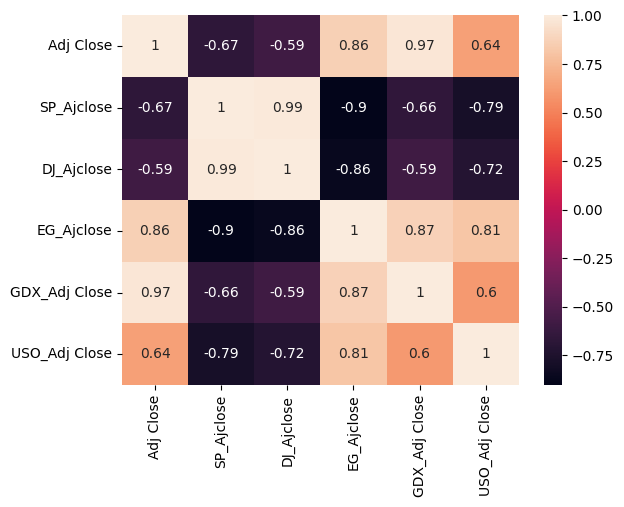

In [ ]:
close_data = pd.DataFrame(df, columns = close_value)
correlation_mat = close_data.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Adj Close'])])
fig.show()

In [ ]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

In [ ]:
fig = px.line(df, x="Date", y=['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
              title='Adj close')
fig.show()

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()
fig = px.scatter(df, x="Date", y="Daily Return", title="Daily Return")
fig.show()

In [ ]:
fig = px.histogram(df, x="Date", y="Daily Return", histfunc="avg", title="Daily Return")
fig.show()

In [ ]:
fig = px.line(df, x="Date", y=['Volume'],
              title='Volume')
fig.show()

In [ ]:
volumn_max = max(df['Volume'])
index = df[df['Volume']==volumn_max].index.values[0]
print("Max Volume's day is:", df['Date'][index],"\n""volume:", df['Volume'][index],'\nthe day of close price:', df['Adj Close'][index])
print('Average Adj close:', df["Adj Close"].mean())

Max Volume's day is: 2013-04-15 
volume: 1.0 
the day of close price: 0.42141974529585907
Average Adj close: 0.3668373907352625


## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
import keras.layers.normalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
Adj_data = df.loc[:,close_value]

adj_close = Adj_data[['Adj Close']]

training_data_len = int(np.ceil( len(Adj_data) * .90 ))

sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(Adj_data)

sc1 = MinMaxScaler(feature_range = (0, 1))
sc_data = sc1.fit_transform(adj_close)

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
# x_train.shape

In [ ]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(128, input_length=shape[1], input_dim=shape[2], activation = 'relu'))
    #model.add(LSTM(1, batch_input_shape=(3, x_train.shape[1], x_train.shape[2]), stateful=True,))
    model.add(Dense(64))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(8))
    model.add(Dense(4))
    model.add(Dense(2))
    model.add(Dense(1))

    model.compile(loss="mse", optimizer="adam",metrics= "accuracy")
    model.summary()
    return model

In [ ]:
model = buildManyToOneModel(x_train.shape)
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model.fit(x_train, y_train, epochs=10, batch_size=4, verbose =1, callbacks=[callback])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 128)               69120     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 2)                

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = Adj_data['Adj Close'][training_data_len:].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])

x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = sc1.inverse_transform(predictions)

6/6 [==============================] - 0s 25ms/step


In [ ]:
t = np.linspace(0, len(y_test), len(y_test))
predictions = np.reshape(predictions,len(predictions))

fig = go.Figure()

fig.add_trace(go.Scatter(x=t, y=y_test,
                    mode='lines',
                    name='True data'))

fig.add_trace(go.Scatter(x=t, y=predictions,
                    mode='lines',
                    name='predict'))


fig.show()